In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import numpy as np

# LETTURA DATI TRAINING

In [8]:
def leggi_dati_lista(nome_cartella):
  lista = []
  for filename in os.listdir(nome_cartella):
    # Costruisci il percorso completo del file
    percorso_file = os.path.join(nome_cartella, filename)

    # Leggi solo la terza colonna del file CSV in un DataFrame e assegna un nome dinamico
    df= pd.read_csv(percorso_file, usecols=[0])

    lista.append(df["acc_X"].values)

  return lista

In [10]:
cartella_train_0 = r'/content/drive/MyDrive/Progetto_manutenzione/file_cut_training/Pitting_degradation_level_0 (Healthy)'
cartella_train_1 = r'/content/drive/MyDrive/Progetto_manutenzione/file_cut_training/Pitting_degradation_level_1'
cartella_train_2 = r'/content/drive/MyDrive/Progetto_manutenzione/file_cut_training/Pitting_degradation_level_2'
cartella_train_3 = r'/content/drive/MyDrive/Progetto_manutenzione/file_cut_training/Pitting_degradation_level_3'
cartella_train_4 = r'/content/drive/MyDrive/Progetto_manutenzione/file_cut_training/Pitting_degradation_level_4'
cartella_train_5 = r'/content/drive/MyDrive/Progetto_manutenzione/file_cut_training/Pitting_degradation_level_5'
cartella_train_6 = r'/content/drive/MyDrive/Progetto_manutenzione/file_cut_training/Pitting_degradation_level_6'

In [12]:
x_train_list_0 = leggi_dati_lista(cartella_train_0)
x_train_list_1 = leggi_dati_lista(cartella_train_1)
x_train_list_2 = leggi_dati_lista(cartella_train_2)
x_train_list_3 = leggi_dati_lista(cartella_train_3)
x_train_list_4 = leggi_dati_lista(cartella_train_4)
x_train_list_5 = leggi_dati_lista(cartella_train_5)
x_train_list_6 = leggi_dati_lista(cartella_train_6)

print('Dati classe 0: ' + str(len(x_train_list_0)))
print('Dati classe 1: ' + str(len(x_train_list_0)))
print('Dati classe 2: ' + str(len(x_train_list_0)))
print('Dati classe 3: ' + str(len(x_train_list_0)))
print('Dati classe 4: ' + str(len(x_train_list_0)))
print('Dati classe 5: ' + str(len(x_train_list_0)))
print('Dati classe 6: ' + str(len(x_train_list_0)))

Dati classe 0: 1619
Dati classe 1: 1619
Dati classe 2: 1619
Dati classe 3: 1619
Dati classe 4: 1619
Dati classe 5: 1619
Dati classe 6: 1619


In [13]:
# Creo lista di tutti i dati di train ignorando le classi 3 e 6
x_train_list = x_train_list_0 + x_train_list_1 + x_train_list_2 + x_train_list_4 + x_train_list_5
x_train = np.asarray(x_train_list)

In [21]:
lista_etichette_train = []

# Creo la lista  delle erichette di train ignorando le etichette dei dati di classe 3 e 6

lista_etichette_train.extend([0] * len(x_train_list_0))
lista_etichette_train.extend([1] * len(x_train_list_1))
lista_etichette_train.extend([2] * len(x_train_list_2))
#lista_etichette_train.extend([3] * len(x_train_list_3))
lista_etichette_train.extend([3] * len(x_train_list_4)) # etichetta 3 significa 4
lista_etichette_train.extend([4] * len(x_train_list_5)) # etichetta 4 significa 5
#lista_etichette_train.extend([6] * len(x_train_list_6))

print('Numero dati totali train: ' + str(len(lista_etichette_train)))

Numero dati totali train: 8264


In [24]:
y_train_integer = np.asarray(lista_etichette_train)
y_train = tf.keras.utils.to_categorical(y_train_integer)

# MODELLO E TRAINING CNN

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SeparableConv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Add
import tensorflow as tf

# Input Layer
input_layer = Input(shape=(20000, 1))

# Separable_Conv1D_1
conv1 =  SeparableConv1D(32, kernel_size=3, strides=1, padding='same', activation='relu')(input_layer)
conv1_mp = MaxPooling1D(pool_size=2, padding='same')(conv1)

# Separable_Conv1D_2
conv2 =  SeparableConv1D(64, kernel_size=3, strides=1, padding='same', activation='relu')(conv1_mp)
conv2_mp = MaxPooling1D(pool_size=2, padding='same')(conv2)

# Separable_Conv1D_3
conv3 =  SeparableConv1D(64, kernel_size=3, strides=4, padding='same', activation='relu')(input_layer)

# Residual Layer 1
residual1 = Add()([conv2_mp, conv3])


# Residual Layer 2
sep_conv_4 = SeparableConv1D(128, kernel_size=3, activation='relu', padding='same')(residual1)
sep_conv_5 = SeparableConv1D(128, kernel_size=3, activation='relu', padding='same')(sep_conv_4)
sep_conv6 = SeparableConv1D(128, kernel_size=3, strides=4, activation='relu', padding='same')(input_layer)
residual2= Add()([sep_conv_5, sep_conv6])


# Global Max Pooling
global_max_pooling = GlobalMaxPooling1D()(residual2)

# Dense Layer
dense_layer = Dense(100, activation='relu')(global_max_pooling)

# Softmax Layer
softmax_layer = Dense(5, activation='softmax')(dense_layer)

# Creazione del modello
model = Model(inputs=input_layer, outputs=softmax_layer)


optimizer = tf.keras.optimizers.experimental.RMSprop(
    learning_rate=0.002,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07
)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

# Visualizzazione della struttura della rete
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 20000, 1)]           0         []                            
                                                                                                  
 separable_conv1d_6 (Separa  (None, 20000, 32)            67        ['input_2[0][0]']             
 bleConv1D)                                                                                       
                                                                                                  
 max_pooling1d_2 (MaxPoolin  (None, 10000, 32)            0         ['separable_conv1d_6[0][0]']  
 g1D)                                                                                             
                                                                                            

In [37]:
model.fit(x_train,y_train, epochs=60)

Epoch 1/20
259/259 [==============================] - 18s 69ms/step - loss: 0.1273 - categorical_accuracy: 0.9552
Epoch 2/20
259/259 [==============================] - 19s 73ms/step - loss: 0.1238 - categorical_accuracy: 0.9560
Epoch 3/20
259/259 [==============================] - 19s 73ms/step - loss: 0.1244 - categorical_accuracy: 0.9537
Epoch 4/20
259/259 [==============================] - 19s 72ms/step - loss: 0.1291 - categorical_accuracy: 0.9552
Epoch 5/20
259/259 [==============================] - 19s 72ms/step - loss: 0.1176 - categorical_accuracy: 0.9589
Epoch 6/20
259/259 [==============================] - 19s 72ms/step - loss: 0.1192 - categorical_accuracy: 0.9587
Epoch 7/20
259/259 [==============================] - 18s 69ms/step - loss: 0.1090 - categorical_accuracy: 0.9606
Epoch 8/20
259/259 [==============================] - 18s 70ms/step - loss: 0.1073 - categorical_accuracy: 0.9618
Epoch 9/20
259/259 [==============================] - 19s 73ms/step - loss: 0.1045 - cat

# LETTURA DATI TEST

In [28]:
cartella_test_0 = r'/content/drive/MyDrive/Progetto_manutenzione/hold_out_test/Pitting_degradation_level_0 (Healthy)'
cartella_test_1 = r'/content/drive/MyDrive/Progetto_manutenzione/hold_out_test/Pitting_degradation_level_1'
cartella_test_2 = r'/content/drive/MyDrive/Progetto_manutenzione/hold_out_test/Pitting_degradation_level_2'
cartella_test_3 = r'/content/drive/MyDrive/Progetto_manutenzione/hold_out_test/Pitting_degradation_level_3'
cartella_test_4 = r'/content/drive/MyDrive/Progetto_manutenzione/hold_out_test/Pitting_degradation_level_4'
cartella_test_5 = r'/content/drive/MyDrive/Progetto_manutenzione/hold_out_test/Pitting_degradation_level_5'
cartella_test_6 = r'/content/drive/MyDrive/Progetto_manutenzione/hold_out_test/Pitting_degradation_level_6'

In [29]:
x_test_list_0 = leggi_dati_lista(cartella_test_0)
x_test_list_1 = leggi_dati_lista(cartella_test_1)
x_test_list_2 = leggi_dati_lista(cartella_test_2)
x_test_list_3 = leggi_dati_lista(cartella_test_3)
x_test_list_4 = leggi_dati_lista(cartella_test_4)
x_test_list_5 = leggi_dati_lista(cartella_test_5)
x_test_list_6 = leggi_dati_lista(cartella_test_6)

print('DATI DI TEST')
print('Dati classe 0: ' + str(len(x_test_list_0)))
print('Dati classe 1: ' + str(len(x_test_list_1)))
print('Dati classe 2: ' + str(len(x_test_list_2)))
print('Dati classe 3 (ignorati): ' + str(len(x_test_list_3)))
print('Dati classe 4 (etichetta 3): ' + str(len(x_test_list_4)))
print('Dati classe 5 (etichetta 4): ' + str(len(x_test_list_5)))
print('Dati classe 6 (ignorati): ' + str(len(x_test_list_6)))

DATI DI TEST
Dati classe 0: 161
Dati classe 1: 157
Dati classe 2: 166
Dati classe 3 (ignorati): 173
Dati classe 4 (etichetta 3): 156
Dati classe 5 (etichetta 4): 156
Dati classe 6 (ignorati): 156


In [30]:
# Creo lista di tutti i dati di test ignorando le classi 3 e 6
x_test_list = x_test_list_0 + x_test_list_1 + x_test_list_2 + x_test_list_4 + x_test_list_5
x_test = np.asarray(x_test_list)

In [31]:
lista_etichette_test = []

# Creo la lista  delle erichette di train ignorando le etichette dei dati di classe 3 e 6

lista_etichette_test.extend([0] * len(x_test_list_0))
lista_etichette_test.extend([1] * len(x_test_list_1))
lista_etichette_test.extend([2] * len(x_test_list_2))
#lista_etichette_test.extend([3] * len(x_test_list_3))
lista_etichette_test.extend([3] * len(x_test_list_4)) # etichetta 3 significa 4
lista_etichette_test.extend([4] * len(x_test_list_5)) # etichetta 4 significa 5
#lista_etichette_test.extend([6] * len(x_test_list_6))

print('Numero dati totali test: ' + str(len(lista_etichette_test)))

y_test_integer = np.asarray(lista_etichette_test)
y_test = tf.keras.utils.to_categorical(y_test_integer)

Numero dati totali test: 796


# TEST DEL MODELLO CNN

In [38]:
evaluation = model.evaluate(x_test, y_test)
print(evaluation)

25/25 [==============================] - 1s 31ms/step - loss: 0.3537 - categorical_accuracy: 0.9121
[0.35367730259895325, 0.9120603203773499]


In [39]:
prediction = model.predict(x_test)

25/25 [==============================] - 1s 27ms/step


In [40]:
# Trova l'indice della classe con la probabilità più alta per ciascun vettore di probabilità
indici_classi_predette = np.argmax(prediction, axis=1)
# Crea la matrice one-hot
matrice_one_hot = np.eye(prediction.shape[1])[indici_classi_predette]

from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test,matrice_one_hot, average='macro'))
print(recall_score(y_test,matrice_one_hot, average='macro'))

0.9183825896325896
0.911492855026669


In [42]:
from sklearn.metrics import confusion_matrix
# Converte la matrice one-hot in etichette predette
etichette_predette = np.argmax(matrice_one_hot, axis=1)

# Converte y_test in etichette reali
etichette_reali = np.argmax(y_test, axis=1)

# Calcola la matrice di confusione
matrice_confusione = confusion_matrix(etichette_reali, etichette_predette)

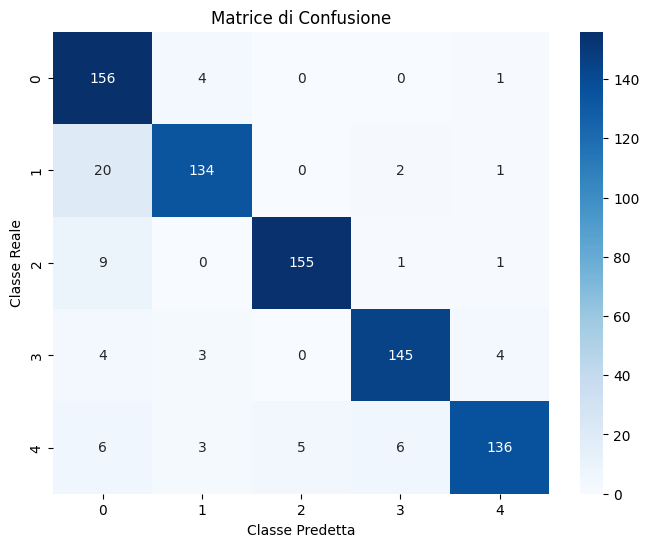

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot della matrice di confusione utilizzando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrice_confusione, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Reale')
plt.title('Matrice di Confusione')
plt.show()


In [46]:
model.save_weights('CNN.h5')

# TEST CON TUTTI LE CLASSI

In [44]:
# Creo le x di test prendendo i dati di tutte le classi
x_test_list_all = x_test_list_0 + x_test_list_1 + x_test_list_2 + x_test_list_3 + x_test_list_4 + x_test_list_5 + x_test_list_6
x_test_all = np.asarray(x_test_list_all)

In [45]:
predizioni_per_tutte_le_classi = model.predict(x_test_all)

36/36 [==============================] - 1s 34ms/step


In [48]:
np.savetxt('predizioni_dati_test.csv', predizioni_per_tutte_le_classi, delimiter=',')